# 前程无忧大数据相关职位信息分析

本项目对前程无忧爬取的18k条大数据相关的职位进行统计分析，针对两类问题：

* 职位相关：包括地域分布，薪酬水平，学历和工作经验
* 公司相关：包括行业，性质和规模


In [1]:
# 引入数据分析和绘图的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
# 载入数据
df = pd.read_excel('qcwy.xlsx')
# 删除重复记录
df = df.drop_duplicates(['原始URL'])
# 过滤字段，仅保留后续分析的字段
fields = ['职位名称', '工作地点', '薪资', '学历', '经验']
df = df[fields]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18284 entries, 0 to 18283
Data columns (total 5 columns):
职位名称    18284 non-null object
工作地点    18284 non-null object
薪资      18284 non-null object
学历      13859 non-null object
经验      8704 non-null object
dtypes: object(5)
memory usage: 857.1+ KB


## 薪资水平

In [3]:
salary = df['薪资'].values
print(salary)

['7000-13000' '8000-10000' '10000-15000' ..., '4000-7000' '6000-10000'
 '3500-4000']


In [4]:
def process_salary(salary):
    """"将薪酬从区间值转为中值"""
    clean_salary = np.asarray(list(map(int, salary.split('-')))).mean()
    return clean_salary

df['薪资'] = df['薪资'].apply(process_salary)
df['薪资'].describe()

count     18284.000000
mean      11549.899256
std       10543.395043
min           0.000000
25%        6250.000000
50%        9000.000000
75%       14583.000000
max      600000.000000
Name: 薪资, dtype: float64

薪酬均值：11.5k/月，中位数：9k，最大值：60万。
简单查了一下给出60万月薪的职位：http://jobs.51job.com/hangzhou/80059124.html?s=01&t=0 是杭州睿明企业管理咨询有限公司给出的猎头职位，40-80万/月，应该属于极特殊情况。

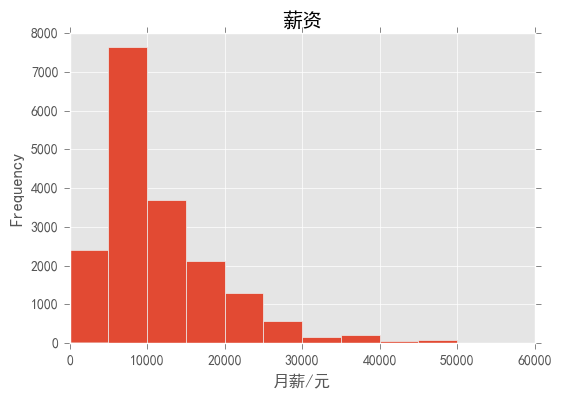

In [5]:
df['薪资'].plot.hist(bins=np.arange(0,6E4,5E3))
plt.xlabel('月薪/元')
plt.title('薪资')

## 职位的地域分布

In [6]:
city = df['工作地点'].values
print(city)

['苏州-工业园区' '武汉-洪山区' '青岛-崂山区' ..., '宁波' '上海-浦东新区' '武汉']


统计招聘需求最多的10个城市

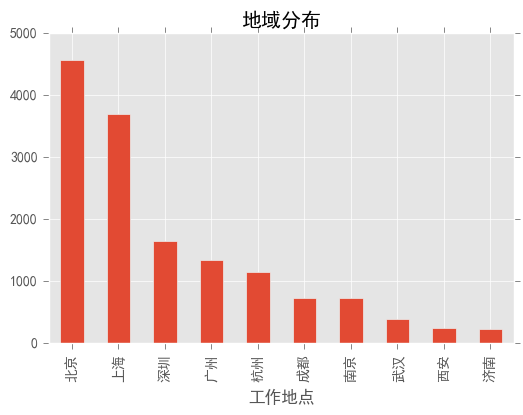

In [7]:
def process_city(city):
    """"删除区级信息"""
    clean_city = city.split('-')[0]
    return clean_city

df['工作地点'] = df['工作地点'].apply(process_city)
df.groupby('工作地点')['职位名称'].count().sort_values(ascending=False).iloc[:10].plot.bar()
plt.title('地域分布')

从上图可以看出，第一梯队：北京和上海；第二梯队：深圳、广州和杭州；第三梯队：其他省会城市

## 职位所在城市与薪资的关系

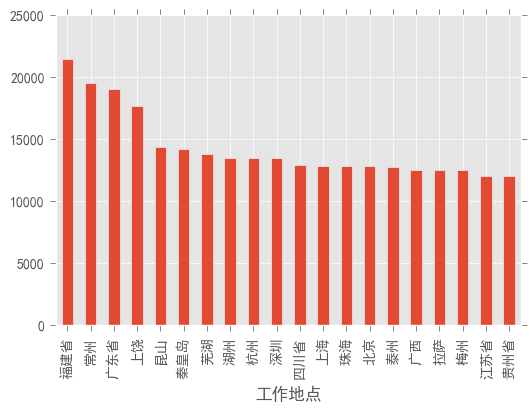

In [8]:
city_df = df[['工作地点', '薪资']]
city_df.groupby('工作地点').mean().sort_values(by='薪资', ascending=False).iloc[:20].plot.bar(legend=False)

初步统计结果可以看出不同地域的薪资水平差异不大，同时也发现一个问题：地域同时有省市两级，后续需要统一一下。

## 学历要求

In [107]:
education_levels = ['初中及以下', '高中', '中专', '中技', '大专', '本科', '硕士', '博士']
education_mapping = {level: i for i, level in enumerate(education_levels)}
grouped_education = df.groupby('学历').count()['职位名称'].reset_index()
key = grouped_education['学历'].map(education_mapping)    
grouped_education = grouped_education.iloc[key.argsort()]
grouped_education

,学历,职位名称
2,初中及以下,4
7,高中,58
0,中专,84
1,中技,8
4,大专,5638
5,本科,7510
6,硕士,532
3,博士,25


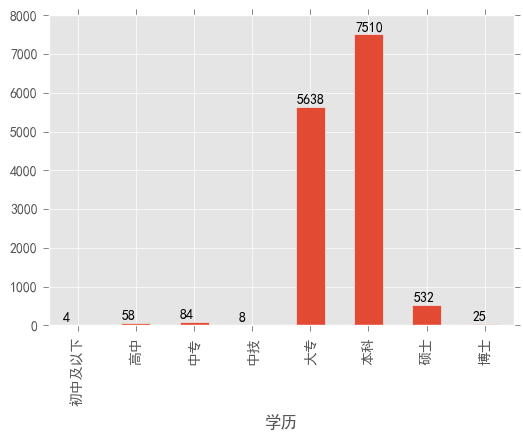

In [108]:
ax = grouped_education.plot.bar(x='学历', legend=False)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height()+100))

大多数招聘岗位仅要求大专或本科学历，少部分需要硕士学历。

# 学历与薪资关系

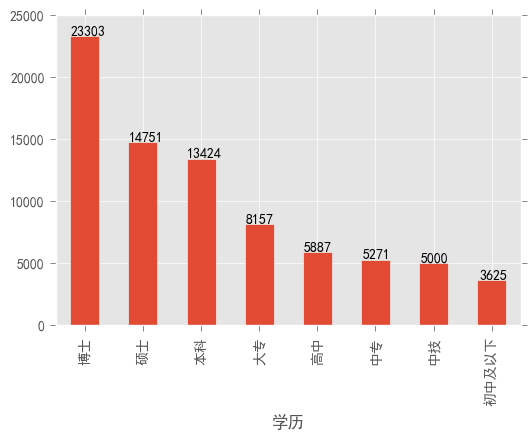

In [10]:
education_df = df[['学历', '薪资']]
ax = education_df.groupby('学历').mean().sort_values(by='薪资', ascending=False).plot.bar(legend=False)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height()+100))

本科和硕士薪资差不多，13k~15k之间，博士最高，有23k。总体上学历越高薪资越高。

In [113]:
experience_levels = ['无工作经验', '1年经验', '2年经验', '3-4年经验', '5-7年经验', '8-9年经验', '10年以上经验']
experience_mapping = {level: i for i, level in enumerate(experience_levels)}
grouped_experience = df.groupby('经验').count()['职位名称'].reset_index()
key = grouped_experience['经验'].map(experience_mapping) 
grouped_experience = grouped_experience.iloc[key.argsort()]
grouped_experience

,经验,职位名称
6,无工作经验,785
1,1年经验,1513
2,2年经验,2231
3,3-4年经验,2904
4,5-7年经验,1132
5,8-9年经验,88
0,10年以上经验,51


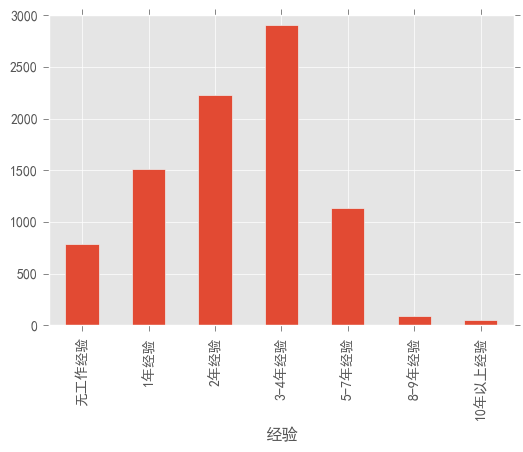

In [115]:
grouped_experience.plot.bar(x='经验', legend=False)

## 工作经验与薪资关系

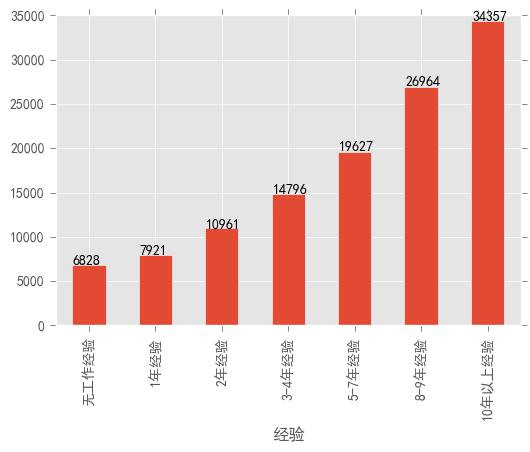

In [12]:
experience_df = df[['经验', '薪资']]
ax = experience_df.groupby('经验').mean().sort_values(by='薪资', ascending=True).plot.bar(legend=False)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height()+100))